# Self-Driving Car Engineer Nanodegree - Luca Fiaschi

## Deep Learning Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

The origina data, used in this project can be found [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip). The deta must be unzip and place in the same folder of the notebook prior to executuon.

In [1]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

In [2]:
# Load pickled data
import pickle
import warnings
warnings.filterwarnings('ignore')

training_file = 'imagesDL/train.p'
validation_file= 'imagesDL/valid.p'
testing_file = 'imagesDL/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

In [3]:
import pandas as pd
import numpy as np

In [4]:
signnames = pd.read_csv('./signnames.csv')
signnames.set_index('ClassId',inplace=True)

def get_name_from_label(label):
    # Helper, transofrm a numeric label into the corresponding strring
    return signnames.loc[label].SignName


In [5]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Number of testing examples.
n_valid = X_valid.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)

print("Number of testing examples =", n_test)

print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

In [6]:
import matplotlib.pyplot as plt
i#mport seaborn as sns
from collections import Counter
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [8]:
counter = Counter(y_train)
print("Train example per class mean {} min {} max {}".format(int(np.mean(list(Counter(y_train).values()))),
                                                    np.min(list(Counter(y_train).values())) ,
                                                    np.max(list(Counter(y_train).values())) ))
print()
print("Most common signs:")
for el in counter.most_common(10):
    print("'{}'".format(get_name_from_label(el[0])),' train samples: {}'.format(el[1]))
print()
print("Most rare signs:")
for el in sorted(counter.items(),key=lambda x: x[1])[:10]:
    print("'{}'".format(get_name_from_label(el[0])),' train samples: {}'.format(el[1]))

NameError: name 'Counter' is not defined

In [7]:
counts = pd.DataFrame(columns=['sign_label','training_samples_count'],data=[(label, count) for label, count in counter.items()])
counts['sign'] = counts.sign_label.apply(get_name_from_label)    
    
    

NameError: name 'counter' is not defined

In [8]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.3)
sns.barplot(x='training_samples_count',y='sign',data=counts,orient='o')
plt.xticks(rotation=90)
plt.ylabel('Sign Name')
plt.xlabel('# Training Samples');
plt.tight_layout()
plt.savefig('plots/training_set_counts.png')


NameError: name 'sns' is not defined

In [9]:
def get_random_samples(n_max=1):
    selected = list()
    
    for current_label in range(43):
        found=0
        while found<n_max:
            ii = np.random.randint(len(y_train))
            
            if current_label == y_train[ii]:
                selected.append(ii)
                found+=1


    assert len(selected) ==  43*n_max
    return list(selected)

In [10]:
plt.figure(figsize=(10,40))
count=0
cols = 10
for ii in get_random_samples(cols):
    count+=1
    plt.subplot(43,cols,count)
    plt.imshow(X_train[ii])
    plt.axis('off')
# plt.tight_layout()
plt.savefig('plots/random_examples.png',bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: 'plots/random_examples.png'

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a . It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

In [11]:
import cv2

Following the published baseline on this model we apply similar normalization and transformations. Images were transformed in the YUV space [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) and normalized with histogram normalization. Finally only the Y channel was selected. These transformations were applied in the transform_img function


In [12]:
img_size = 32

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def transform_img(img_in):
    img_in = img_in.copy()
    img_out= sharpen_img(img_in)
    img_out = cv2.cvtColor(img_in, cv2.COLOR_RGB2YUV)

    img_out[:,:,0] = cv2.equalizeHist(img_out[:,:,0])
#     img_out[:,:,1] = cv2.equalizeHist(img_out[:,:,1])
#     img_out[:,:,2] = cv2.equalizeHist(img_out[:,:,2])
    
    return img_out[:,:,0]

def random_rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def random_scale_img(img):
    img2=img.copy()
    sc_y=0.4*np.random.rand()+1.0
    img2=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    
    dy = int((img2.shape[1]-img.shape[0])/2)
    end = img.shape[1]-dy
    img2 = img2[dy:end,:,:]
    assert img2.shape[0] == 32
#     print(img2.shape,dy,end)
    return img2

#Compute linear image transformation ing*s+m
def lin_img(img,s=1.0,m=0.0):
    img2=cv2.multiply(img, np.array([s]))
    return cv2.add(img2, np.array([m]))

#Change image contrast; s>1 - increase
def contr_img(img, s=1.0):
    m=127.0*(1.0-s)
    return lin_img(img, s, m)


def augment_img(img):
    img = img.copy()
    img=contr_img(img, 1.8*np.random.rand()+0.2)
    img=random_rotate_img(img)
    img=random_scale_img(img)

    return transform_img(img)

In [13]:
img = X_train[1000]
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.axis('off')
out = augment_img(img)
print(out.shape)
plt.imshow(out)
plt.title('Augmented Image')
plt.tight_layout()
plt.savefig('plots/augmented_img_example.png',bbox_inches='tight')


(32, 32)


FileNotFoundError: [Errno 2] No such file or directory: 'plots/augmented_img_example.png'

In [14]:
plt.figure(figsize=(10,10))
img = X_train[100]
plt.subplot(3,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(3,2,2)
plt.axis('off')
plt.imshow(transform_img(img))
plt.title('Transformed Image')


img = X_train[1000]
plt.subplot(3,2,3)
plt.imshow(img)
plt.axis('off')
plt.subplot(3,2,4)
plt.axis('off')
plt.imshow(transform_img(img))

img = X_train[2190]
plt.subplot(3,2,5)
plt.imshow(img)

plt.axis('off')
plt.subplot(3,2,6)
plt.axis('off')
plt.imshow(transform_img(img))
plt.tight_layout()
plt.savefig('plots/image_transformations.png',bbox_inches='tight')


FileNotFoundError: [Errno 2] No such file or directory: 'plots/image_transformations.png'

In [15]:
# Transform all images and augment training datfa
X_train_transf = list()
y_train_transf = list()
X_test_transf = list()
X_valid_transf = list()
for ii in range(X_train.shape[0]):
    img = X_train[ii]
    label = y_train[ii]
    
    imgout = transform_img(img)
    imgout.shape = (1,) + imgout.shape + (1,)
    X_train_transf.append(imgout)
    y_train_transf.append(label)
    for j in range(10):
        imgout = augment_img(img)
        imgout.shape = (1,) + imgout.shape + (1,)
        X_train_transf.append(imgout)
        y_train_transf.append(label)
    

for ii in range(X_valid.shape[0]):
    img = X_valid[ii]
    img = transform_img(img)
    img.shape = (1,) + img.shape + (1,)
    X_valid_transf.append(img)
    
for ii in range(X_test.shape[0]):
    img = X_test[ii]
    img = transform_img(img)
    img.shape = (1,) + img.shape + (1,)
    X_test_transf.append(img)

X_test_transf = np.concatenate(X_test_transf,axis=0)
X_train_transf = np.concatenate(X_train_transf,axis=0)
X_valid_transf = np.concatenate(X_valid_transf,axis=0)
y_train_transf = np.array(y_train_transf)

### Model Architecture

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    """
    Implement classic lenet architecture in tensorflow
    """
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #  Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #  Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SFlatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #  Activation.
    fc1    = tf.nn.relu(fc1)
    
    dr1 = tf.nn.dropout(fc1, keep_prob) 
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(dr1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    
    dr2 = tf.nn.dropout(fc2, keep_prob) 
    
    #  Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dr2, fc3_W) + fc3_b
    
    return logits

In [18]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [19]:
rate = 0.0001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
predict_operation = tf.argmax(logits, 1)
predict_proba_operation = tf.nn.softmax(logits=logits)

ValueError: Only call `softmax_cross_entropy_with_logits` with named arguments (labels=..., logits=..., ...)

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


def predict(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    predicted_proba = list()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        predicted_proba.extend( sess.run(predict_proba_operation, feed_dict={x: batch_x, keep_prob: 1.0}))
        
        
    return predicted_proba


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [22]:
X_train = X_train_transf
X_valid = X_valid_transf
X_test = X_test_transf
y_train = y_train_transf

In [23]:
from sklearn.utils import shuffle
from time import time

In [ ]:
#Do some logging
import logging, datetime
logger = logging.getLogger()

def setup_file_logger(log_file):
    hdlr = logging.FileHandler(log_file)
    formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
    hdlr.setFormatter(formatter)
    logger.addHandler(hdlr) 
    logger.setLevel(logging.INFO)

def log(message):
    #outputs to Jupyter console
    print('{} {}'.format(datetime.datetime.now(), message))
    #outputs to file
    logger.info(message)

setup_file_logger('training.log')

In [ ]:
EPOCHS = 150
BATCH_SIZE = 128
dropout = .3

errors = list()

saver = tf.train.Saver()
start = time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    log("Training... dropout = {} , batch_size = {} , learning rate = {}".format(dropout, BATCH_SIZE, rate))
    print()
    for i in range(EPOCHS):
        
        try:
            X_train, y_train = shuffle(X_train, y_train)
#             print("Before Train %d sec"%(time() - start))
            
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1 - dropout})
            
#             print("After Train %d sec"%(time() - start))
            
            validation_accuracy = evaluate(X_valid, y_valid)
            training_accuracy = evaluate(X_train, y_train)
            
            errors.append((training_accuracy,validation_accuracy))
            log("EPOCH %d - %d sec ..."%(i+1, time() - start))
            log("Training error = {:.3f} Validation error = {:.3f}".format(1- training_accuracy , 
                                                                                   1- validation_accuracy))
            
            print()
            
#             print("After error computation %d sec"%(time() - start))
            if i > 5 and i % 3 == 0:
                saver.save(sess, './models/lenet')
                print("Model saved %d sec"%(time() - start))
        except KeyboardInterrupt:
            print('Accuracy Model On Test Images: {}'.format(evaluate(X_test,y_test)))   
            break
            
    saver.save(sess, './models/lenet')

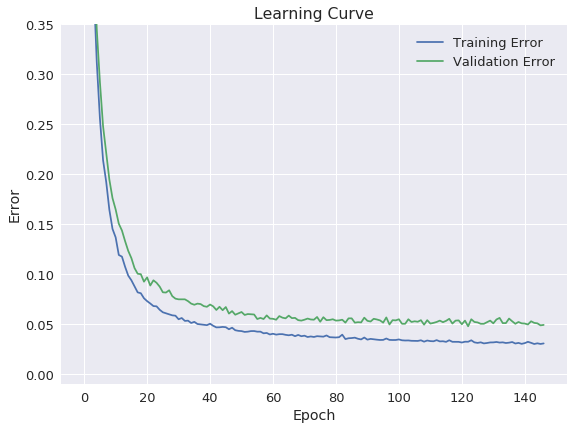

In [39]:
plt.figure(figsize=(8,6))
plt.title('Learning Curve')
plt.plot([1 - el[0] for el in errors])
plt.plot([1 - el[1] for el in errors])
plt.ylim([-.01,0.35])
plt.legend(['Training Error','Validation Error'])
plt.tight_layout()
plt.savefig('plots/learning_curve.png')
plt.ylabel('Error')
plt.xlabel('Epoch');


In [28]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models'))
    print('Accuracy Model On Training Images: {:.2f}'.format(evaluate(X_train,y_train)))
    print('Accuracy Model On Validation Images: {:.2f}'.format(evaluate(X_valid,y_valid))) 
    print('Accuracy Model On Test Images: {:.2f}'.format(evaluate(X_test,y_test)))   

Accuracy Model On Training Images: 0.97
Accuracy Model On Validation Images: 0.95
Accuracy Model On Test Images: 0.93


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [29]:
import skimage
from skimage import io
from skimage import transform
from skimage.filters import gaussian
import glob

### Load and Output the Images

./images_signs/double_curve.png
./images_signs/50-Km-limit.jpg
./images_signs/children_crossing.jpg
./images_signs/go_straigth_or_left.jpg
./images_signs/80-Km-limit.jpg


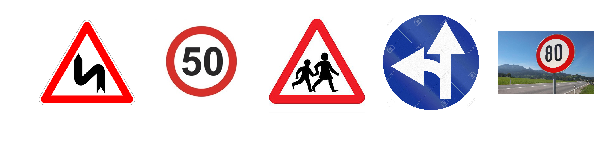

In [40]:
i=1
plt.figure(figsize=(12,10))
for el in glob.glob('./images_signs/*.png') + glob.glob('./images_signs/*.jpg'):
    print(el)
    img = io.imread(el)    
#     img = transform.resize(img,(32,32), order=3)
#     img = gaussian(img,.4,multichannel=True)
    
    plt.subplot(1,6,i)
    plt.imshow(img)
    i+=1
    plt.axis('off')
    
    img = transform.resize(img,(32,32), order=3)
    img = gaussian(img,.4,multichannel=True)
    
plt.savefig('plots/new_images.png',bbox_inches='tight')

### Predict the Sign Type for Each Image

In [31]:
# Read the images
i=1
images_wild = list()
labels_wild = list()
for line in open('images_signs/data.txt','r'):
    fname, label = line.strip().split(' ')
    label = int(label)
    fname = 'images_signs/'+fname
    img = io.imread(fname)    
    img = transform.resize(img,(32,32), order=3)
    img = gaussian(img,.6,multichannel=True)*255
    img = transform_img(img.astype(np.uint8))
    
    img.shape = (1,) + img.shape + ( 1,)
    images_wild.append(img)
    labels_wild.append(label)
    

In [32]:
images = np.concatenate(images_wild,axis=0)

In [33]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models'))
    
    predicted_proba = np.vstack(predict(images))

    print('Accuracy Model On Internet Images: {}'.format(evaluate(images, labels_wild)))    

Accuracy Model On Internet Images: 0.1666666716337204


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [34]:
for true_label,row in zip(labels_wild,predicted_proba):
    top5k = np.argsort(row)[::-1][:5]
    top5p = np.sort(row)[::-1][:5]
    print('Top 5 Labels for image \'{}\':'.format(get_name_from_label(true_label)))
    for k,p in zip(top5k,top5p):
          print(' - \'{}\' with prob = {:.2f} '.format(get_name_from_label(k),p))

Top 5 Labels for image 'Double curve':
 - 'Speed limit (30km/h)' with prob = 0.76 
 - 'End of speed limit (80km/h)' with prob = 0.11 
 - 'End of no passing' with prob = 0.02 
 - 'Speed limit (20km/h)' with prob = 0.02 
 - 'Children crossing' with prob = 0.02 
Top 5 Labels for image 'Children crossing':
 - 'Children crossing' with prob = 0.71 
 - 'Right-of-way at the next intersection' with prob = 0.17 
 - 'Go straight or right' with prob = 0.04 
 - 'Dangerous curve to the right' with prob = 0.04 
 - 'Slippery road' with prob = 0.02 
Top 5 Labels for image 'Speed limit (50km/h)':
 - 'Speed limit (80km/h)' with prob = 0.68 
 - 'Speed limit (50km/h)' with prob = 0.31 
 - 'Speed limit (100km/h)' with prob = 0.01 
 - 'Speed limit (60km/h)' with prob = 0.00 
 - 'Speed limit (30km/h)' with prob = 0.00 
Top 5 Labels for image 'Stop':
 - 'Dangerous curve to the right' with prob = 0.95 
 - 'Keep right' with prob = 0.04 
 - 'Turn left ahead' with prob = 0.01 
 - 'Go straight or right' with prob =